#### **Logistic Regression**
`Logistic Regression` is build on Linear Regression. The logistic regression model is a type of linear classifier that uses the sigmoid function to

In [1]:
import pandas as pd

data = pd.read_csv('C:/Users/Abs_Sayem/Desktop/ML/machine_learning/ml_projects/dataset/insurance.csv', encoding='utf-8')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Convert Categorical fields to Numerical**

In [3]:
data['sex']    = pd.Categorical(data["sex"]).codes
data['smoker'] = pd.Categorical(data["smoker"]).codes
data['region'] = pd.Categorical(data["region"]).codes

In [4]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


**Check Relationship between `age` vs `bmi` and `children` vs `charges`**

Text(0, 0.5, 'smoker')

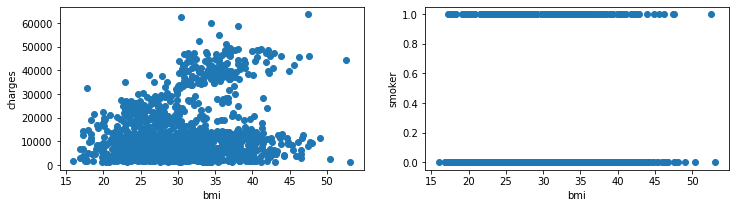

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,3))
x1 = data['bmi'].values.flatten()
y1 = data['charges'].values.flatten()
x2 = data['bmi'].values.flatten()
y2 = data['smoker'].values.flatten()
axs[0].scatter(x1, y1)
axs[0].set_xlabel('bmi')
axs[0].set_ylabel('charges')
axs[1].scatter(x2, y2)
axs[1].set_xlabel('bmi')
axs[1].set_ylabel('smoker')

*If we see the above plots, there is no linear relationship between the training_feature and label in right . So, in this case we can not use the linear regression analysis.*

**Understanding Logistic Regression** In linear regression `y = mx + c` if c=0, `y = mx` where, y is the hypothesis (also define by `h`) that depends on `x` and its co-efficient `m` (can also define by `Θ`). We can define the equation as - `h = Θx`. In logistic regression, the regression line will be `h = (1 / (1 + e^(y=mx)))` or `h = (1/(1+e^z))` where, `z` is the linear function `(y=mx+c)` or we can say `z=Θx`. This Logistic function also called Sigmoid function. It returns the value between (o to 1). If we have values like- 0.4, 0.7, 0.8 then it consider a threshold value (say- 0.5) and set the value under threshold as 0 and above the threshold as 1.
* For single training_feature : `z = Θx`
* For multiple training_features : `z = Θ1x1 + Θ2x2 + ..... + Θnxn`

**Setup `X` and `Y`**

In [12]:
x = data.drop(columns=['smoker', 'region', 'charges'])
y = data['smoker']

In [13]:
x.head(10)

,age,sex,bmi,children
0,19,0,27.900,0
1,18,1,33.770,1
2,28,1,33.000,3
3,33,1,22.705,0
4,32,1,28.880,0
5,31,0,25.740,0
6,46,0,33.440,1
7,37,0,27.740,3
8,37,1,29.830,2
9,60,0,25.840,0


**Scale Data**: In our dataset some values are large in range like- 'age' and 'bmi' compare with 'sex' and 'children'. This may cause inappopriate training. So, we have to scale the large data into a standard range. For this we will use `StandardScaler` from sklearn. StandardScaler uses the formula: `z = (x-u)/s` where, `u` = Mean and `s` = Standard Deviation.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Split Dataset into Train-Test**

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [15]:
print(f"X_Train: {len(x_train)}")
print(f"X_Test : {len(x_test)}")

X_Train: 1070
X_Test : 268


**Load Logistic Regression Model and Fit to our Dataset**

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

**Check the Coeficient and Intercept**

In [17]:
m = lr.coef_
c = lr.intercept_
print("Coefficients:", m)
print("Intercept   :", c)

Coefficients: [[-0.00889891  0.24515215 -0.00654842  0.05651495]]
Intercept   : [-1.00111725]
